#  Linear Regression Model 만들기(CPU)
* Coefficient: a = 2
* Bias/Intercept : b = 1
* Equation: y = 2x + 1

In [1]:
import numpy as np

## 1. Simple 데이터셋 만들기

In [2]:
x_values = [i for i in range(11)]
print("x_values: ", x_values)

# numpy로 변환
x_train = np.array(x_values, dtype=np.float32)
print("x_train(numpy) shape :", x_train.shape)

# 중요: 2차원으로 변환
x_train = x_train.reshape(-1, 1)
print("x_train(reshape) shape :", x_train.shape)

x_values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train(numpy) shape : (11,)
x_train(reshape) shape : (11, 1)


* y = 2x + 1 만들기

In [3]:
y_values = [2*i + 1 for i in x_values]

print("y_values: ", y_values)

y_values:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [4]:
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)
    
print("y_values: ", y_values)

y_values:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [5]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [6]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

# 2. Linear Regression 모델 만들기
* Linear Model
    * True Equation: y = 2x + 1
* Forward
    * Example
        * input x = 1
        * output : hat{y} = ?

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Step1. Create Model Class

In [8]:
# Create Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

* input : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* output : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

### Step2. Instantiate Model Class

In [9]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

### Step3. instantiate Loss Class* MSE(Mean Squared Error) Loss 사용<br>
<img src="https://user-images.githubusercontent.com/60699771/85705712-7221b380-b71c-11ea-9d60-ef1cb2cd4e1e.png" align=left>

In [10]:
criterion = nn.MSELoss()

### Step4. instantiate Optimizer Class
<img src="https://user-images.githubusercontent.com/60699771/85705722-751ca400-b71c-11ea-8977-8e92cc53c36d.png" align=left>

In [11]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step5. Train Model
* 1 epoch : going through the whole x_train data once
    * 100 epochs : 100 x mapping x)train = [0, 1, 2, 3, ,4, 5, 6, 7 ,8 ,9, 10]
    
* process
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t parameters
    6. Update parameters using gradients
        * parameters = parameters - lr * parameters_gradients
    7. Repeat

In [12]:
epochs = 100

In [13]:
for epoch in range(epochs):
    epoch += 1
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    #Forward to get ouput
    outputs = model.forward(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 1, loss 360.9476318359375
epoch 2, loss 29.78594398498535
epoch 3, loss 2.770277976989746
epoch 4, loss 0.5628896951675415
epoch 5, loss 0.3790781795978546
epoch 6, loss 0.3603646457195282
epoch 7, loss 0.3551592528820038
epoch 8, loss 0.3510967791080475
epoch 9, loss 0.3471686542034149
epoch 10, loss 0.34329116344451904
epoch 11, loss 0.33945751190185547
epoch 12, loss 0.33566659688949585
epoch 13, loss 0.33191850781440735
epoch 14, loss 0.3282119631767273
epoch 15, loss 0.3245469033718109
epoch 16, loss 0.3209225833415985
epoch 17, loss 0.3173389732837677
epoch 18, loss 0.3137953579425812
epoch 19, loss 0.31029120087623596
epoch 20, loss 0.30682626366615295
epoch 21, loss 0.30340006947517395
epoch 22, loss 0.3000122308731079
epoch 23, loss 0.29666173458099365
epoch 24, loss 0.29334884881973267
epoch 25, loss 0.29007354378700256
epoch 26, loss 0.2868342101573944
epoch 27, loss 0.28363099694252014
epoch 28, loss 0.28046369552612305
epoch 29, loss 0.2773319482803345
epoch 30, loss

### Compare Data

In [14]:
predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.342452 ],
       [ 2.437145 ],
       [ 4.531838 ],
       [ 6.6265306],
       [ 8.721224 ],
       [10.815917 ],
       [12.910609 ],
       [15.005302 ],
       [17.099995 ],
       [19.194687 ],
       [21.289381 ]], dtype=float32)

In [15]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

## 3. Plot Graph로 확인해보기

In [16]:
import matplotlib.pyplot as plt

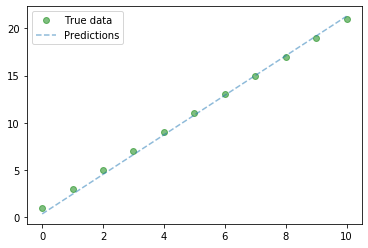

In [17]:
# Clear figure
plt.clf()

# Get Predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

## 4. Save Model

In [18]:
save_model = True
if save_model is True:
    # Saves only parameters (alpha and beta)
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 5. Load Model

In [19]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))